In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
DATASET_LINK='http://files.grouplens.org/datasets/movielens/ml-100k.zip'

In [3]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

--2025-05-15 13:30:55--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  23.4MB/s    in 0.2s    

2025-05-15 13:30:56 (23.4 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

**Loading MovieLens dataset**

Loading u.info -- The number of users, items, and ratings in the u data set.

In [4]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(overall_stats[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [ ]:
DATA_FOLDER = 'ml-100k'

In [ ]:
data = pd.read_csv(
    os.path.join(DATA_FOLDER, 'u.data'),
    sep='\t',
    names=['user_id', 'item_id', 'rating', 'timestamp']
)
data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
user_data = pd.read_csv(
    os.path.join(DATA_FOLDER, 'u.user'),
    sep='|',
    names=['id', 'age', 'gender', 'occupation', 'zip_code']
)
user_data.describe()

,id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [ ]:
films = pd.read_csv(
    os.path.join(DATA_FOLDER, 'u.item'),
    sep='|',
    names=['id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western'],
    encoding='unicode_escape'
)
films.describe()

,id,video_release_date,unknown,action,adventure,animation,childrens,comedy,crime,documentary,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   action              1682 non-null   int64  
 7   adventure           1682 non-null   int64  
 8   animation           1682 non-null   int64  
 9   childrens           1682 non-null   int64  
 10  comedy              1682 non-null   int64  
 11  crime               1682 non-null   int64  
 12  documentary         1682 non-null   int64  
 13  drama               1682 non-null   int64  
 14  fantasy             1682 non-null   int64  
 15  film-noir           1682 non-null   int64  
 16  horror

In [ ]:
films.drop(columns=['video_release_date', 'imdb_url'], inplace=True)


# **Data Statisitcs**

Films By Genres

In [ ]:
film_user = pd.merge(data, user_data, left_on='user_id', right_on='id')
film_user = pd.merge(film_user, films, left_on='item_id', right_on='id')
genre_watches = {}
for genre in films.columns[5:]:
    # Count how many unique users have watched each genre
    genre_watches[genre] = film_user[film_user[genre] == 1]['user_id'].nunique()
genre_watches

{'unknown': 10,
 'action': 938,
 'adventure': 901,
 'animation': 659,
 'childrens': 805,
 'comedy': 940,
 'crime': 914,
 'documentary': 352,
 'drama': 943,
 'fantasy': 512,
 'film-noir': 618,
 'horror': 789,
 'musical': 754,
 'mystery': 897,
 'romance': 943,
 'sci-fi': 908,
 'thriller': 937,
 'war': 925,
 'western': 491}

In [ ]:
films['drama'].sum()
genre_watches['drama']

943

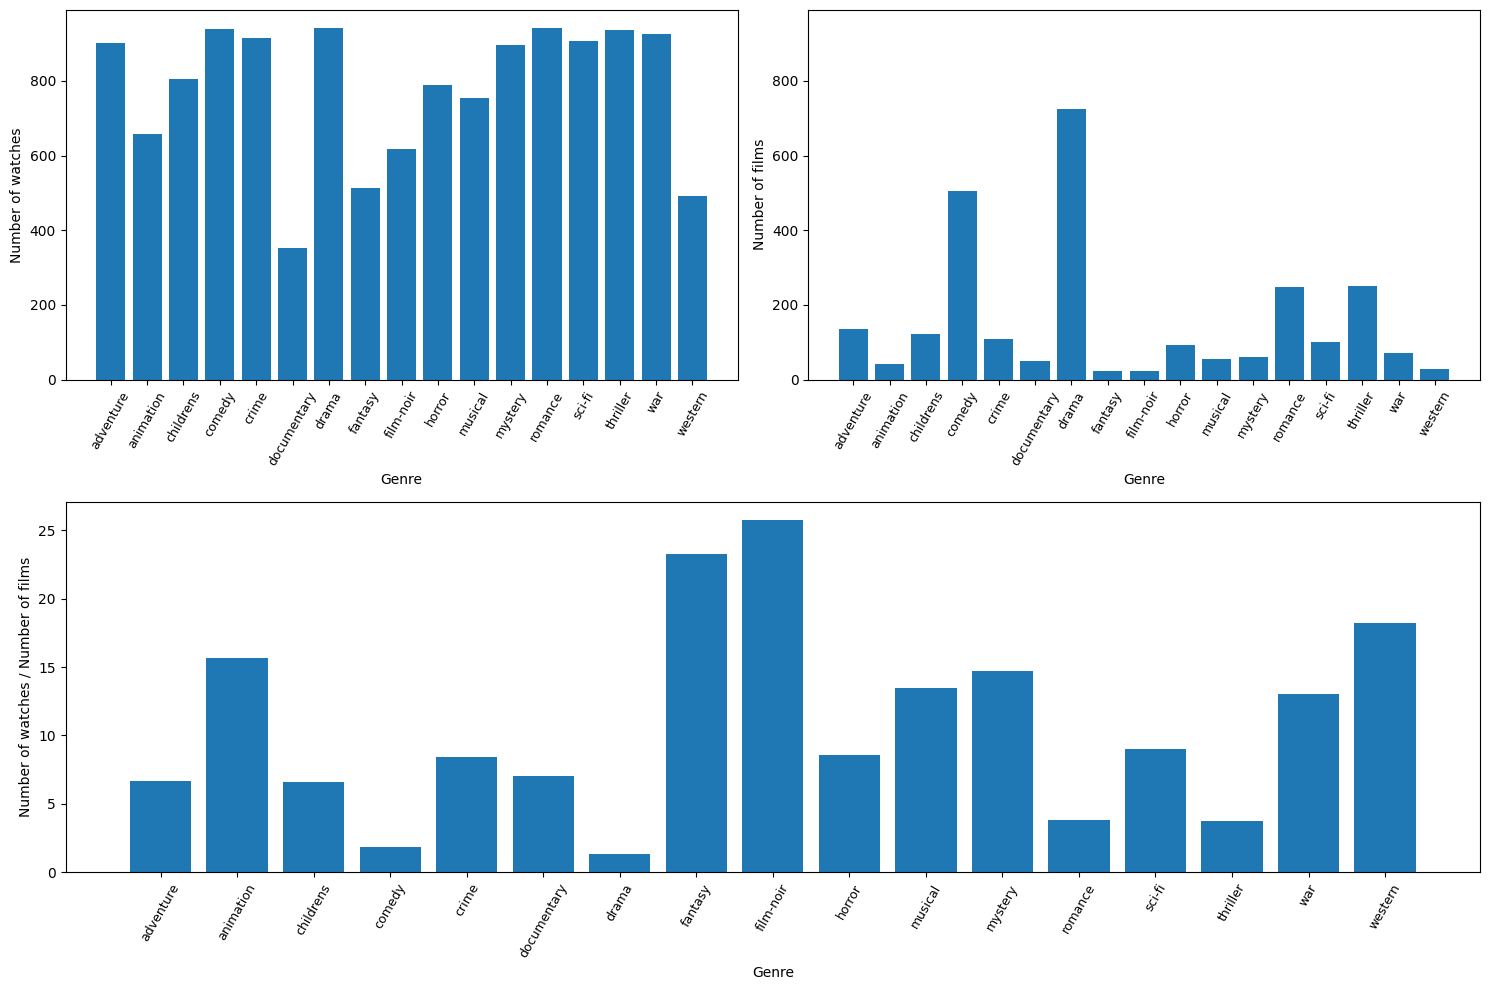

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)

ax1.bar(genre_watches.keys(), genre_watches.values())
ax1.set_xticks(range(len(genre_watches.keys())))
ax1.set_xticklabels(genre_watches.keys(), rotation=60, fontsize=9)
ax1.set_ylabel('Number of watches')
ax1.set_xlabel('Genre')

ax2 = fig.add_subplot(222, sharey=ax1)
ax2.bar(genre_watches.keys(), [films[genre].sum() for genre in genre_watches.keys()])
ax2.set_xticks(range(len(genre_watches.keys())))
ax2.set_xticklabels(genre_watches.keys(), rotation=60, fontsize=9)
ax2.set_ylabel('Number of films')
ax2.set_xlabel('Genre')


# axis take (3, 4)
bot_ax = fig.add_subplot(2, 2, (3, 4))
bot_ax.bar(genre_watches.keys(), [genre_watches[genre] / films[genre].sum() for genre in genre_watches.keys()])
bot_ax.set_xticks(range(len(genre_watches.keys())))
bot_ax.set_xticklabels(genre_watches.keys(), rotation=60, fontsize=9)
bot_ax.set_ylabel('Number of watches / Number of films')
bot_ax.set_xlabel('Genre')


plt.tight_layout()
plt.show()

**Unique Genres Watched By Users**

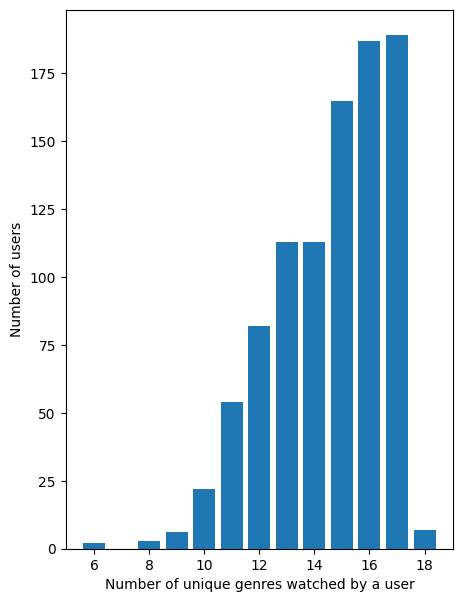

In [ ]:
x = film_user.iloc[:, -19:-1].merge(film_user['user_id'], left_index=True, right_index=True).sort_values(by='user_id')
x = x.groupby('user_id').max()
x.insert(0, 'total', x.sum(axis=1))
plt.figure(figsize=(5, 7))

plt.bar(
    x=x.total.value_counts().index,
    height=x.total.value_counts().values
)

plt.xlabel('Number of unique genres watched by a user')
plt.ylabel('Number of users')
plt.show()

Minimal Rating score of each user.

In [ ]:
user_min_ratings = film_user.groupby('user_id')['rating'].min()
user_min_ratings

,rating
user_id,
1,1
2,1
3,1
4,2
5,1
...,...
939,2
940,1
941,2
